In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("C:/Users/USER/Desktop/data/스마트 공장 제품 품질 상태 분류 AI 온라인 해커톤")
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

print(train.head())
print(f'train shape {train.shape}')

  PRODUCT_ID  Y_Class  Y_Quality        TIMESTAMP     LINE PRODUCT_CODE  X_1  \
0  TRAIN_000        1   0.533433  2022-06-13 5:14  T050304         A_31  NaN   
1  TRAIN_001        2   0.541819  2022-06-13 5:22  T050307         A_31  NaN   
2  TRAIN_002        1   0.531267  2022-06-13 5:30  T050304         A_31  NaN   
3  TRAIN_003        2   0.537325  2022-06-13 5:39  T050307         A_31  NaN   
4  TRAIN_004        1   0.531590  2022-06-13 5:47  T050304         A_31  NaN   

   X_2  X_3  X_4  ...  X_2866  X_2867  X_2868  X_2869  X_2870  X_2871  X_2872  \
0  NaN  NaN  NaN  ...   39.34   40.89   32.56   34.09   77.77     NaN     NaN   
1  NaN  NaN  NaN  ...   38.89   42.82   43.92   35.34   72.55     NaN     NaN   
2  NaN  NaN  NaN  ...   39.19   36.65   42.47   36.53   78.35     NaN     NaN   
3  NaN  NaN  NaN  ...   37.74   39.17   52.17   30.58   71.78     NaN     NaN   
4  NaN  NaN  NaN  ...   38.70   41.89   46.93   33.09   76.97     NaN     NaN   

   X_2873  X_2874  X_2875  
0   

- PRODUCT_ID : 제품의 고유 ID
- Y_Class : 제품 품질 상태(Target)
  - 0 : 적정 기준 미달 (부적합)
  - 1 : 적합
  - 2 : 적정 기준 초과 (부적합)
- Y_Quality : 제품 품질 관련 정량적 수치
- TIMESTAMP : 제품이 공정에 들어간 시각
- LINE : 제품이 들어간 공정 LINE 종류 ('T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305' 존재)
- PRODUCT_CODE : 제품의 CODE 번호 ('A_31', 'T_31', 'O_31' 존재)
- X_1 ~ X_2875 : 공정 과정에서 추출되어 비식별화된 변수

### EDA

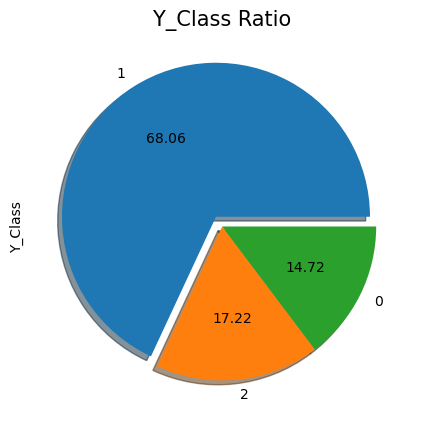

In [134]:
# Y_Class의 비율을 확인해보자

f, ax = plt.subplots(figsize = (5,5))
train['Y_Class'].value_counts(normalize = True).plot(kind = 'pie', ax = ax, autopct = '%.2f', shadow = True, explode = [0.075, 0, 0])
plt.title('Y_Class Ratio', fontsize = 15)
plt.show()

1의 비율이 높다. 적합한것이 68%이고 나머지는 32%정도이다.

In [135]:
train.groupby(['Y_Class'])['Y_Quality'].describe()
# 평균 측면에서는 Y_Quality가 크게 다르지않다.

,count,mean,std,min,25%,50%,75%,max
Y_Class,,,,,,,,
0,88.0,0.520837,0.004603,0.500856,0.519440,0.522054,0.524113,0.525067
1,407.0,0.530253,0.002444,0.525086,0.528378,0.530308,0.532129,0.534843
2,103.0,0.542031,0.008038,0.534951,0.536354,0.538508,0.546555,0.578841


In [136]:
train['TIMESTAMP'] = pd.to_datetime(train['TIMESTAMP'])
test['TIMESTAMP'] = pd.to_datetime(test['TIMESTAMP'])

In [137]:
train['LINE'].value_counts()
# 각 라인별로 제품이 다르게 들어간다.

T100304    175
T100306    174
T050304     78
T010306     70
T010305     59
T050307     42
Name: LINE, dtype: int64

In [138]:
def Line_Y(Line_name):
  f, ax = plt.subplots(figsize = (3,3))
  train[train['LINE']==Line_name]['Y_Class'].value_counts().plot(kind = 'pie', autopct = '%.2f')
  plt.title(Line_name, fontsize = 15)

  plt.show()

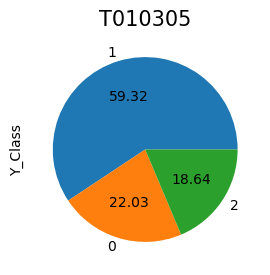

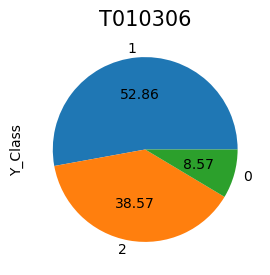

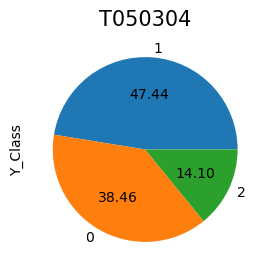

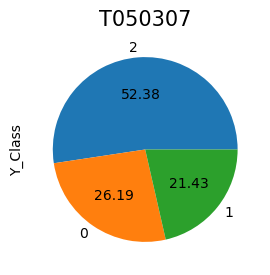

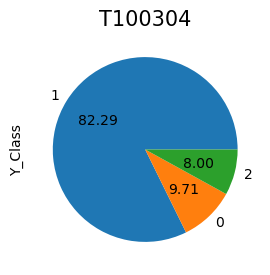

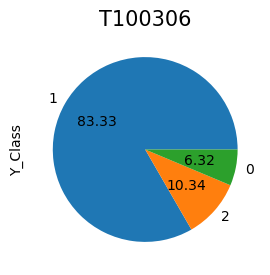

In [139]:
Line_names = np.unique(train['LINE'])

for i in Line_names:
  Line_Y(i)

# T100304,T100306이 1비율이 높다. 즉, 정상인것들을 많이 배출하는 공정라인이라는 뜻

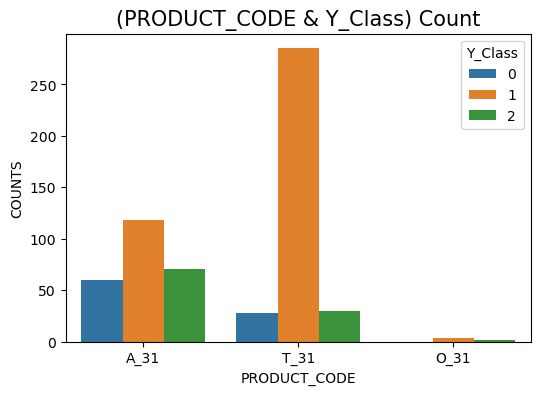

In [140]:
temp = train.groupby(['Y_Class'])['PRODUCT_CODE'].value_counts().to_frame().rename(columns = {
    'PRODUCT_CODE' : 'COUNTS'
}).reset_index()

f, ax = plt.subplots(figsize = (6,4))
sns.barplot(x = temp['PRODUCT_CODE'],
            y = temp['COUNTS'],
            hue = temp['Y_Class'])

plt.title('(PRODUCT_CODE & Y_Class) Count', fontsize = 15)
plt.show()

# T_31에서 확실히 품질이 양호한듯하다

In [141]:
train = train.fillna(0)
test = test.fillna(0)

In [142]:
train_corr = train.corr()['Y_Class']
train.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_4072\3541119863.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr()['Y_Class']
C:\Users\USER\AppData\Local\Temp\ipykernel_4072\3541119863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
Y_Class,1.000000,0.813885,-0.003244,-0.031998,NaN,-0.028564,-0.032277,NaN,-0.024051,-0.026872,...,-0.111978,-0.109532,-0.096989,-0.122089,-0.080304,-0.163228,NaN,NaN,NaN,NaN
Y_Quality,0.813885,1.000000,-0.026368,-0.094544,NaN,-0.091426,-0.094111,NaN,-0.085765,-0.090587,...,-0.046995,-0.040684,-0.038950,-0.053556,-0.020830,-0.074940,NaN,NaN,NaN,NaN
X_1,-0.003244,-0.026368,1.000000,0.254230,NaN,0.255384,0.260300,NaN,0.249740,0.254666,...,-0.133977,-0.133666,-0.133839,-0.133150,-0.135115,-0.134671,NaN,NaN,NaN,NaN
X_2,-0.031998,-0.094544,0.254230,1.000000,NaN,0.997775,0.997898,NaN,0.982838,0.996794,...,-0.523443,-0.522228,-0.522902,-0.520211,-0.527889,-0.526154,NaN,NaN,NaN,NaN
X_3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X_2871,-0.163228,-0.074940,-0.134671,-0.526154,NaN,-0.527327,-0.525935,NaN,-0.522328,-0.527037,...,0.826920,0.827865,0.776610,0.839165,0.746275,1.000000,NaN,NaN,NaN,NaN
X_2872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_2873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X_2874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
features = []

In [143]:
train_corr.sort_values(ascending = False)

Y_Class      1.000000
Y_Quality    0.813885
X_248        0.264064
X_373        0.263227
X_374        0.263227
               ...   
X_2844            NaN
X_2872            NaN
X_2873            NaN
X_2874            NaN
X_2875            NaN
Name: Y_Class, Length: 2877, dtype: float64

In [144]:
line_name = train['LINE'].unique()

for name in line_name:
    globals()[name] = train[train['LINE']==name]

,Y_Class,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
count,78.000000,78.000000,78.0,78.0,78.0,78.0,78.0,78.0,78.0,78.0,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.0,78.0,78.0
mean,0.756410,0.527951,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.286410,46.582308,41.802179,44.952308,57.281538,0.858974,0.0,0.0,0.0,0.0
std,0.687285,0.008371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.058968,20.217138,18.360532,19.907633,23.791451,0.350301,0.0,0.0,0.0,0.0
min,0.000000,0.513751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.000000,0.521655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.960000,44.337500,40.370000,35.930000,62.807500,1.000000,0.0,0.0,0.0,0.0
50%,1.000000,0.527643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.440000,55.115000,50.025000,55.455000,64.685000,1.000000,0.0,0.0,0.0,0.0
75%,1.000000,0.531569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.140000,58.685000,53.980000,56.927500,66.742500,1.000000,0.0,0.0,0.0,0.0
max,2.000000,0.560568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.240000,65.480000,60.000000,59.930000,79.750000,1.000000,0.0,0.0,0.0,0.0


### Data Preprocessing

In [145]:
train['hours'] = train['TIMESTAMP'].dt.hour
train['minute'] = train['TIMESTAMP'].dt.minute

test['hours'] = test['TIMESTAMP'].dt.hour
test['minute'] = test['TIMESTAMP'].dt.minute

train = train.drop(columns = ['TIMESTAMP', 'PRODUCT_ID', 'Y_Quality'])
test = test.drop(columns = ['TIMESTAMP', 'PRODUCT_ID'])

In [146]:
from sklearn.preprocessing import LabelEncoder

encoder_features = ['LINE', 'PRODUCT_CODE']


for features in encoder_features:
  le = LabelEncoder()
  temp = le.fit_transform(train[features])
  temp2 = le.transform(test[features])

  train[features] = temp
  test[features] = temp2

train

,Y_Class,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875,hours,minute
0,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.56,34.09,77.77,0.0,0.0,0.0,0.0,0.0,5,14
1,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,43.92,35.34,72.55,0.0,0.0,0.0,0.0,0.0,5,22
2,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.47,36.53,78.35,0.0,0.0,0.0,0.0,0.0,5,30
3,2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.17,30.58,71.78,0.0,0.0,0.0,0.0,0.0,5,39
4,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,46.93,33.09,76.97,0.0,0.0,0.0,0.0,0.0,5,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,5,2,2.0,95.0,0.0,45.0,10.0,0.0,50.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,14,30
594,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.89,55.10,66.49,1.0,0.0,0.0,0.0,0.0,22,38
595,0,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.00,0.00,1.0,0.0,0.0,0.0,0.0,22,47
596,1,4,1,40.0,94.0,0.0,45.0,11.0,0.0,45.0,...,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,14,38


### Machine Learning Modeling(BaseLine)

In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score

from imblearn.over_sampling import SMOTE

y = train['Y_Class']
train_new = train.drop(columns = ['Y_Class'])

sm = SMOTE()
over_train_x, over_train_y = sm.fit_resample(train_new, y)

print(f'over_sampling shape {over_train_x.shape}')
print(f'over_sampling shape {over_train_y.shape}')

train_x, val_x, train_y, val_y = train_test_split(over_train_x,over_train_y, test_size = 0.2, random_state = 123)
rfc = RandomForestClassifier(
                             random_state = 42)

rfc.fit(train_x, train_y)

pred = rfc.predict(val_x)

print(accuracy_score(pred, val_y))
print(f1_score(pred, val_y, average = 'macro'))

over_sampling shape (1221, 2879)
over_sampling shape (1221,)
0.9224489795918367
0.9228043305115863


In [148]:
scores = cross_val_score(rfc, train_x, train_y, scoring = 'f1_macro', cv = 5)

In [149]:
print(scores)

print("-"*150)
print(np.mean(scores))

[0.95398184 0.91247663 0.92820513 0.89812155 0.79586443]
------------------------------------------------------------------------------------------------------------------------------------------------------
0.8977299160542328


### Test

In [150]:
test_pred = rfc.predict(test)

print(test_pred)

[1 1 1 0 1 2 1 0 0 2 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1
 1 1 1 1 1 2 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 0 0 0 0 1 1 1
 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 2 1 1 1 1 1 0 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [151]:
sub = pd.read_csv('./sample_submission.csv')
sub['Y_Class'] = test_pred

sub.to_csv('./sub_base.csv', index = False)

### 수정사항

✔️ **Base Line = 0.5**

1️. SMOTE로 Classimblance (f1_macro기준 0.54)
  